In [1]:
import numpy as np
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from detect_sign import detect_sign
from matplotlib.patches import Rectangle

# physical_devices = tf.config.list_physical_devices('GPU') 
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def sobel(img):
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    grad = np.sqrt(grad_x ** 2 + grad_y ** 2)
    img = (grad * 255 / grad.max()).astype(np.uint8)
    return img

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    # img = sobel(img)
    img = img / 255       
    return img

In [3]:
className = []
labelFile = "chinese_dataset/labels.csv"
data = pd.read_csv(labelFile)

for _, row in data.iterrows():
    className.append(row["Name"])

In [4]:
modelPath = "trained_model_chinese_local"
model = keras.models.load_model(modelPath)

In [5]:
testImagePath = "test_images_chinese_road_sign"
imagePathList = os.listdir(testImagePath)
images = []
original_images = []
detection_coordinate = []

for x in imagePathList:
    img = cv2.imread(os.path.join(testImagePath, str(x)))

    x, y, w, h = detect_sign(img)

    if x and y and w and h:
        images.append(img[y:y + h, x:x + w])
        original_images.append(img)
        detection_coordinate.append((x, y, w, h))

images = np.array(images, dtype=object)
original_images = np.array(original_images, dtype=object)
detection_coordinate = np.array(detection_coordinate, dtype=object)

Predict Success?
Stop ( 99.99998807907104 )


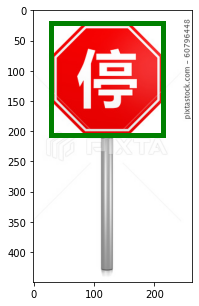

Hati-hati pagar ( 53.72224450111389 )


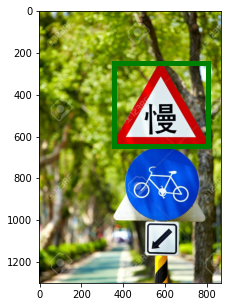

Predict Success?
Stop ( 94.7450041770935 )


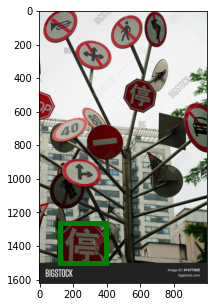

Predict Success?
Silang merah background biru ( 98.83604049682617 )


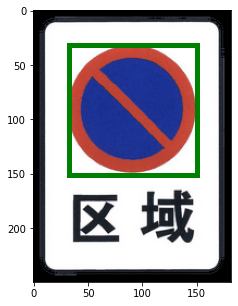

Predict Success?
Dilarang klakson ( 99.99879598617554 )


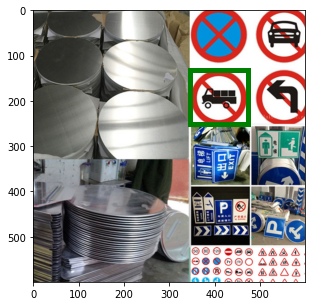

Predict Success?
Stop ( 99.99955892562866 )


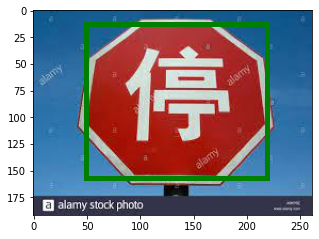

Predict Success?
Silang merah background biru ( 90.43896198272705 )


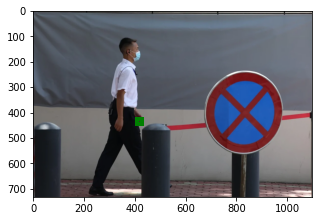

Predict Success?
Yield (segitiga kebalik) ( 99.99998807907104 )


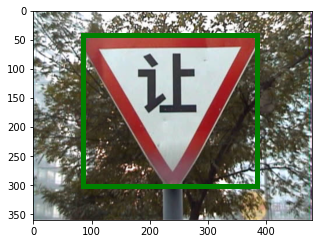

Silang merah background biru ( 60.80672740936279 )


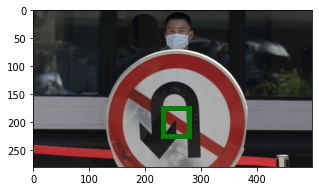

Predict Success?
Dilarang mendahului ( 70.28197050094604 )


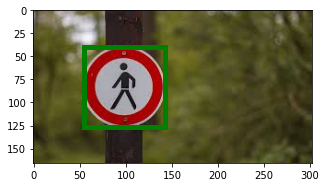

Predict Success?
Panah arah barat daya ( 98.13554883003235 )


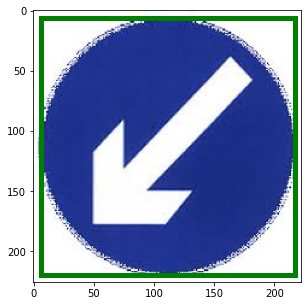

Predict Success?
Dilarang klakson ( 99.99992847442627 )


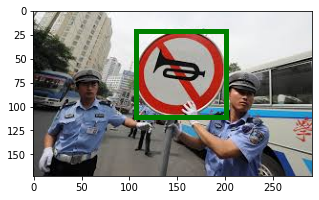

Predict Success?
Dilarang klakson ( 99.99972581863403 )


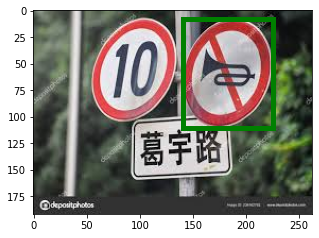

Speed 30 kmh ( 47.03436493873596 )


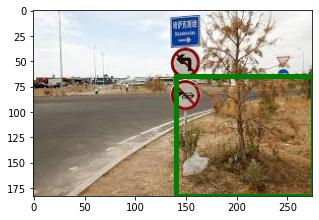

Predict Success?
Speed 30 kmh ( 100.0 )


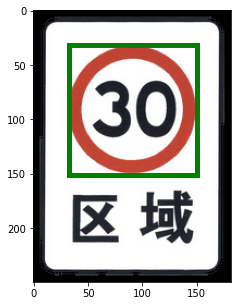

Predict Success?
Boleh belok kanan ( 99.99896287918091 )


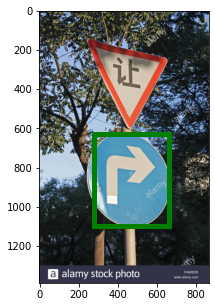

In [6]:
predictionThreshold = 0.7

for i in range(len(images)):
    img = images[i]
    original_image = original_images[i]

    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    img = img.reshape(1, 32, 32, 1)

    predictions = model.predict(img)
    classIndex = np.argmax(predictions, axis=-1)
    probabilityValue = np.amax(predictions)

    if probabilityValue > predictionThreshold:
        print("Predict Success?")
        print(className[int(classIndex)], "(", probabilityValue * 100, ")")
    else:
        print(className[int(classIndex)], "(", probabilityValue * 100, ")")

    plt.figure(figsize = (5, 5))
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

    x, y, w, h = detection_coordinate[i]
    ax = plt.gca()
    rect = Rectangle((x, y), w, h, linewidth = 5, edgecolor = 'green', facecolor = 'none')
    ax.add_patch(rect)

    plt.show()